# DSCI100 Planning Stage (Individual)

#### Sora Takamura

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## (1) Data Description

This dataset contains **196 observations** and **7 variables**. Each row represents data from a single player, including their personal details and information when they play Minecraft.  
The purpose of this dataset is to explore what player characteristics are more predictive of newsletter subscription. The data were collected by a research group in Computer Science at UBC, led by Frank Wood.  
They set up a Minecraft research server where people could join, play, and their personal characteristics and behaviors in the game were automatically recorded. 

#### Variables

| Variable | Type | Description | Summary / Mean Value |
|----------|------|-------------|------------|
| **experience** | categorical | player's level of experience. | 5 levels: Beginner, Amateur, Regular, Veteran, and Pro. Most players fall into the Amateur group. |
| **subscribe** | categorical | TRUE if the player subscribed to the newsletter; FALSE otherwise. | TRUE: 142, FALSE: 52 |
| **hashedEmail** | character | anonymized player's email address. | NA |
| **played_hours** | numerical | total hours each player has spent playing the game. | mean: 5.90 (hours) |
| **name** | character | name | NA |
| **gender** | categorical | gender. | This dataset has six gender identities, where the majority of players are male. |
| **Age** | numerical | age. | mean: 21.14 (years) |

**Limitations:**
Although there are a few missing values in the "Age" variable, this dataset looks relatively clean.

##  (2) Questions

**Broad question:** What factors influence whether a player subscribes to the Minecraft newsletter?  
**Specific question:** Can a player's experience level, time spent playing, gender, and age predict their likelihood of subscribing to the Minecraft newsletter?

In this project, the **response variable** is **subscribe**, which indicates whether a player has subscribed to the newsletter or not. The **explanatory variables** are **experience**, **played_hours**, **genders**, and **Age** because these variables represent a player's characteristics and activity levels that would affect their decision to subscribe. Those irrelevant columns such as **hashedEmail** and **name** will be removed. This dataset has behavioral information for each player, which makes it possible to examine subscription patterns across different player types and activity levels.

## (3) Exploratory Data Analysis and Visualization

### Reading the dataset

In [2]:
mc_players <- read_csv("Data/players.csv")
mc_players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
colnames(mc_players)
glimpse(mc_players)

[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


### Data Wrangling

In [4]:
# removing irrelevent columns
mc_players <- mc_players |>
    select(experience,
           subscribe,
           played_hours,
           gender,
           Age) |>
# removing rows with missing values
    filter(!is.na(Age)) |>
# converting categorical variables to factors
    mutate(experience = as.factor(experience),
           subscribe = as.factor(subscribe),
           gender = as.factor(gender))

glimpse(mc_players)

Rows: 194
Columns: 5
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


### Mean Value Table

In [5]:
# mean value for quantitative variables (played_hours and Age)

mean_table <- mc_players |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
              mean_age = mean(Age, na.rm = TRUE))
mean_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,21.13918


### Plots

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8) 

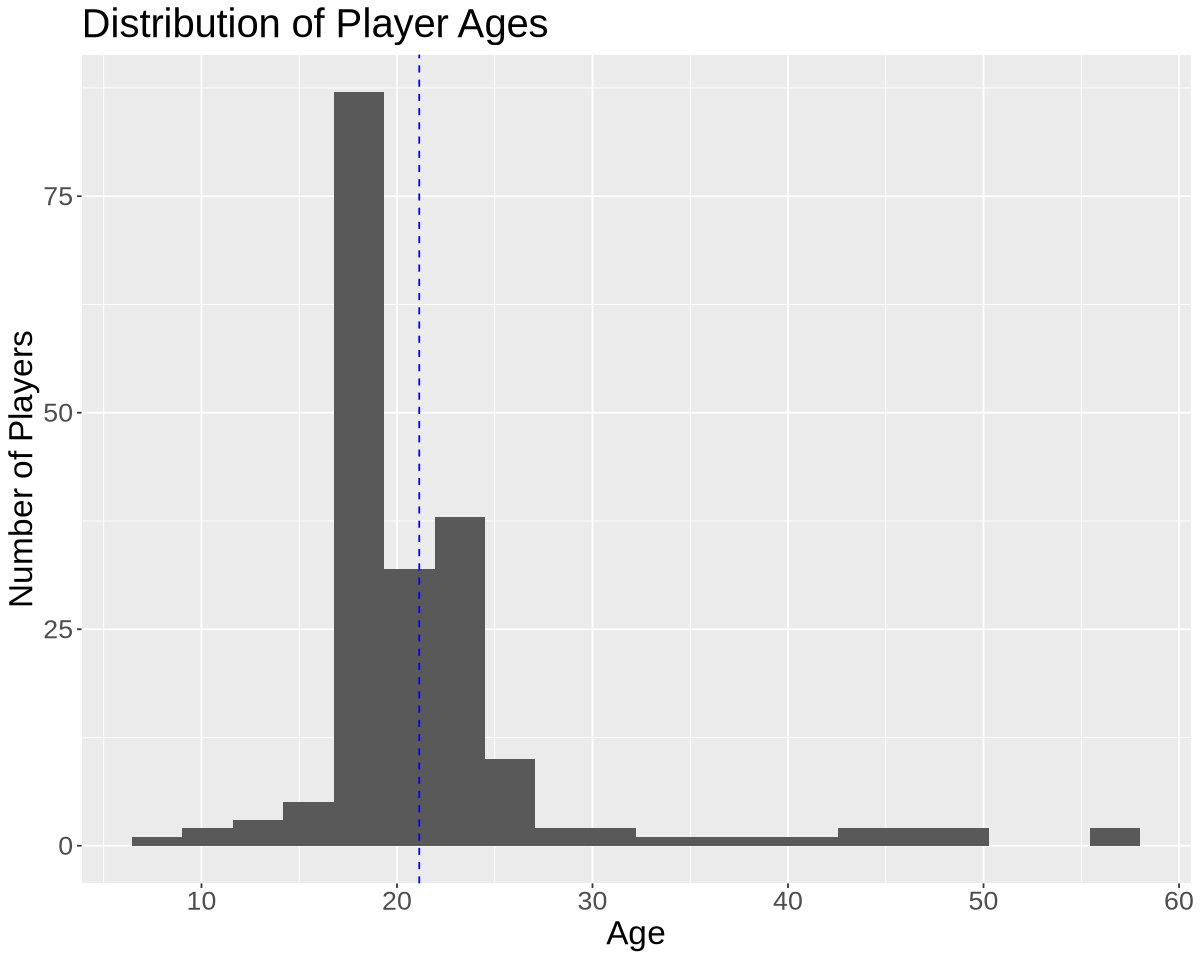

In [7]:
age_plot <- mc_players |>
    ggplot(aes(x = Age)) + 
    geom_histogram(bins = 20) + 
    geom_vline(xintercept = mean(mc_players$Age, na.rm = TRUE), color = "blue", linetype = "dashed") + # blue dashed line represents the mean age
    labs(title = "Distribution of Player Ages", x = "Age", y = "Number of Players") +
    theme(text = element_text(size = 15))

age_plot

This plot shows most players are around 20 years old.

### Average played hours by experience level

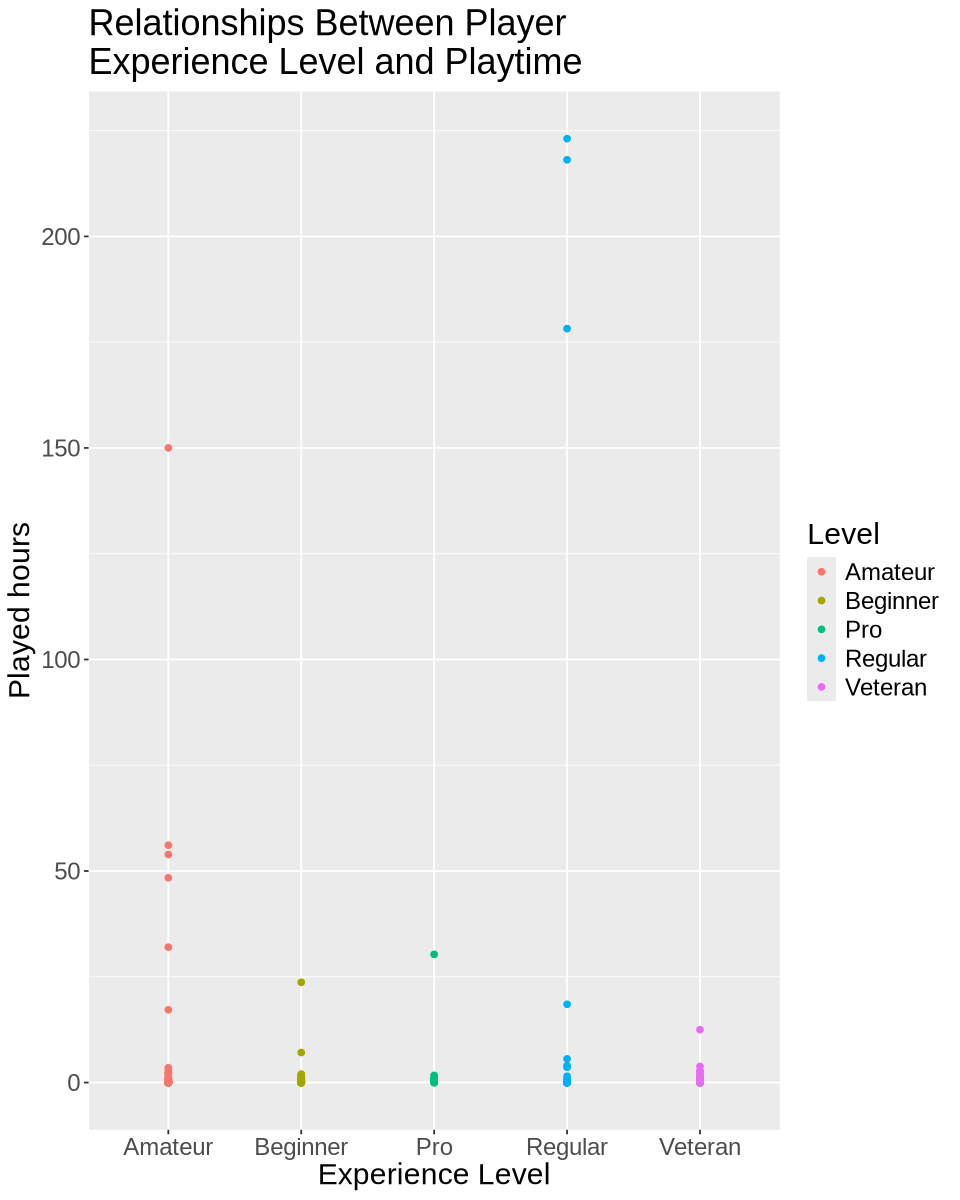

In [14]:
# average played hours by experience level
options(repr.plot.width = 8, repr.plot.height = 10)
playtime_vs_level <- mc_players |>
    ggplot(aes(x = experience, y = played_hours, color = experience)) + geom_point() +
    labs(title = "Relationships Between Player\nExperience Level and Playtime",
         x = "Experience Level", y = "Played hours", color = "Level") +
    theme(text = element_text(size = 18)) 

playtime_vs_level

Game playtime has no effect for their experience levels.

## (4) Methods and Plan

To answer my question about whether player characteristics can predict newsletter subscription, I'm planning to use a KNN (K-nearest neighbours) model. I chose this method because KNN is suitable for predicting categorial outcomes based on similarity to past observations. Therefore, it makes it possible for me to see whether players with similar ages, experiecne levels gender, and playtime tend to make the same subsctiption choice(TRUE or FALSE).

#### **Assmuptions:**
- Players with similar characteristics are likely to make similar choices.
- All numerical variables are on a similar scale.

#### **Limitations:** 
- It wouldn't work well if the classes are not balanced.
- Outliers can strongly affect the results.

I will choose the value of k that gives the best accuracy by using cross-validation.

#### **Procedures**
1. Standardize all numerical variables (Age & played_hours)
2. Convert "experience" and "gender" variables into categorical variables.
3. Split the data into a training set (75%) and a testing set (25%) before any scaling or modeling.
4. To find the best value of K, cross-validation will be used. (the training set)
5. Test the final model on the test set.